<a href="https://colab.research.google.com/github/vigneshwar315/machinelearning/blob/main/MLAssignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Paper Referred:

Mall Customer Segmentation Using K-Means Clustering Authors: Ashwani, Gurleen Kaur, Lekha Bhambhu Published: December 2023 in Proceedings of Data Analytics and Management (pp. 459–474) researchgate.net

**Research Gap:** Papers often fix number of clusters (k) without evaluation metrics.

**Improvement Idea:** Tune optimal k using Silhouette Score, Elbow method, and standardize features.

In [23]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [24]:
df = pd.read_csv('/content/Mall_Customers.csv')
print(df.head())
print(df.columns)


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [25]:
print("\nDataset Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())


Dataset Shape: (200, 5)

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [26]:

# Step 4: Data Preprocessing
# Encode 'Gender' column
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

# Select numeric features for clustering
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

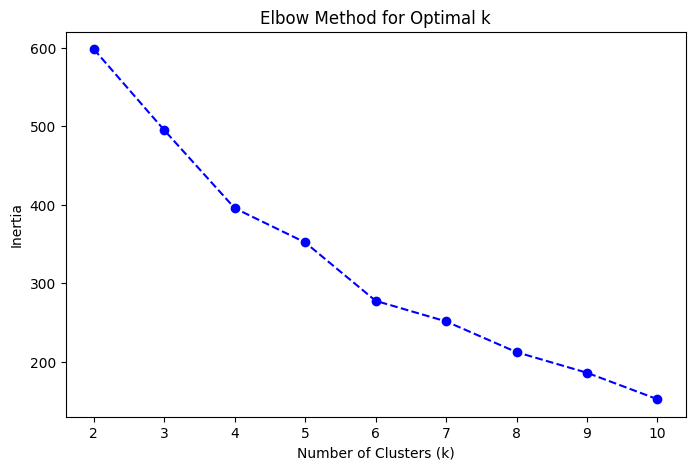

In [27]:
# Step 5: Find Optimal K using Elbow Method
inertia = []
K = range(2, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

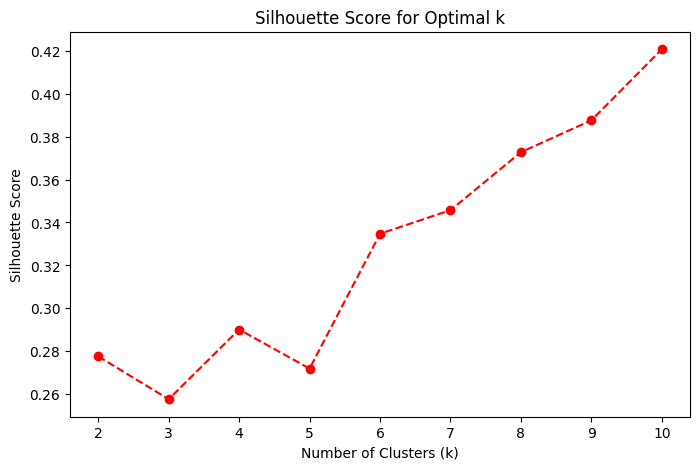


 Optimal number of clusters (based on Silhouette Score): 10


In [28]:
# Step 6: Evaluate using Silhouette Score
silhouette_scores = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'ro--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

optimal_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"\n Optimal number of clusters (based on Silhouette Score): {optimal_k}")


In [29]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


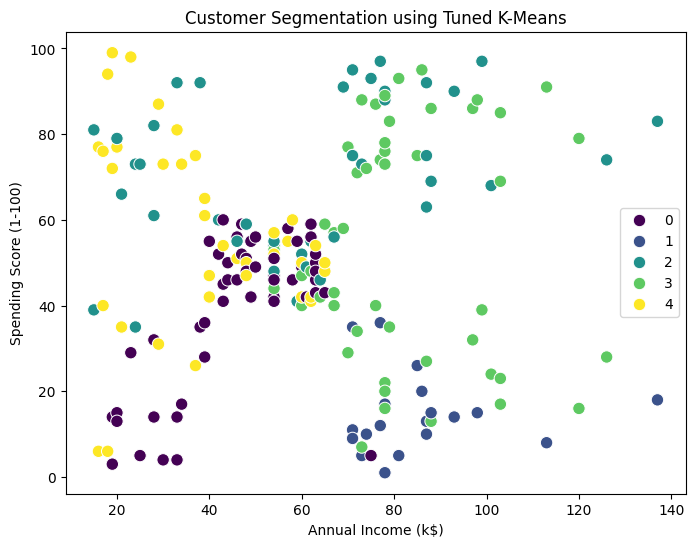

In [30]:
# Step 8: Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,
    palette='viridis',
    s=80
)
plt.title('Customer Segmentation using Tuned K-Means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


Cluster Summary:
                Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        56.470588           46.098039               39.313725
1        39.500000           85.150000               14.050000
2        28.690476           60.904762               70.238095
3        37.897959           82.122449               54.448980
4        27.315789           38.842105               56.210526


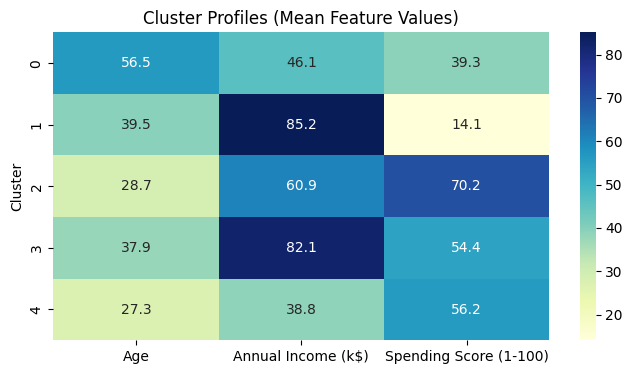

In [31]:

# Step 9: Cluster Analysis
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nCluster Summary:\n", cluster_summary)

# Step 10: Visualize Cluster Profiles
plt.figure(figsize=(8, 4))
sns.heatmap(cluster_summary, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Cluster Profiles (Mean Feature Values)")
plt.show()

✅ Dataset loaded successfully!

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergent

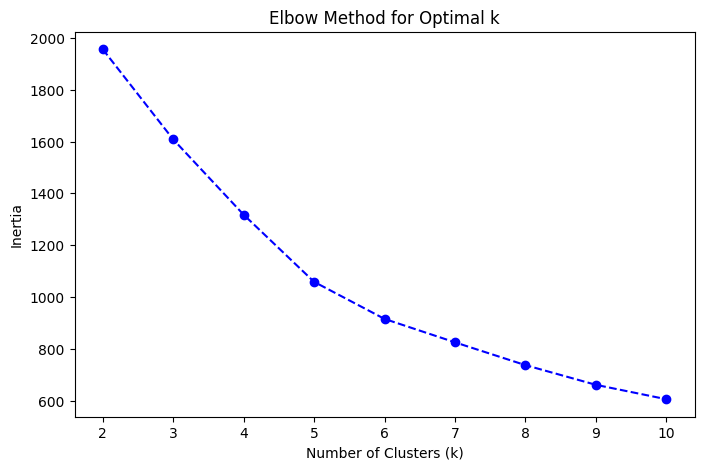

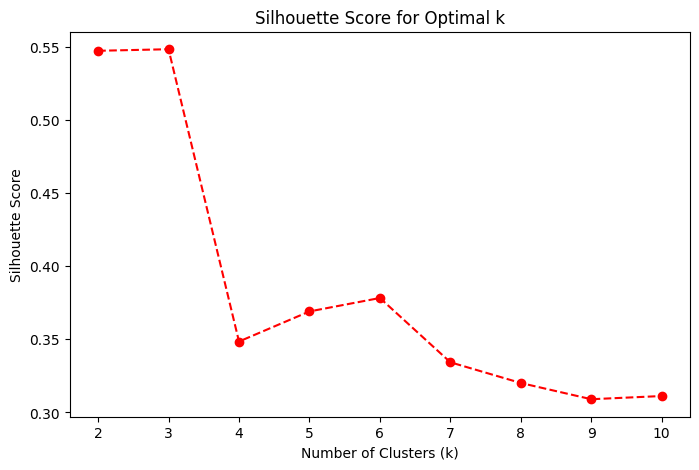


✅ Optimal number of clusters based on Silhouette Score: 3

Cluster Centers (original scale):

          Fresh          Milk       Grocery        Frozen  Detergents_Paper  \
0   9092.155556   2967.759259   3807.411111   2271.759259        989.814815   
1  15964.900000  34708.500000  48536.900000   3054.600000      24875.200000   
2  32957.984127   4997.349206   5884.761905   8422.841270        954.603175   
3   5754.166667  10866.604167  16607.104167   1464.125000       7202.875000   
4  36847.000000  43950.000000  20170.000000  36534.000000        239.000000   

     Delicassen  
0    978.962963  
1   2942.800000  
2   2462.968254  
3   1813.385417  
4  47943.000000  


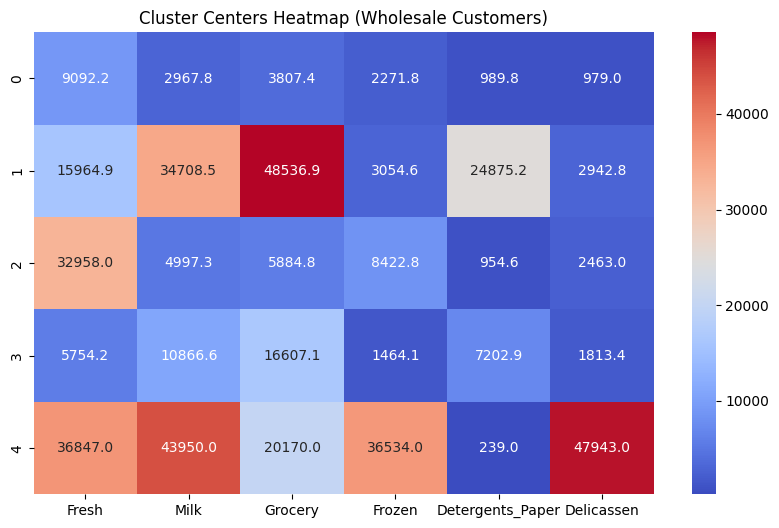

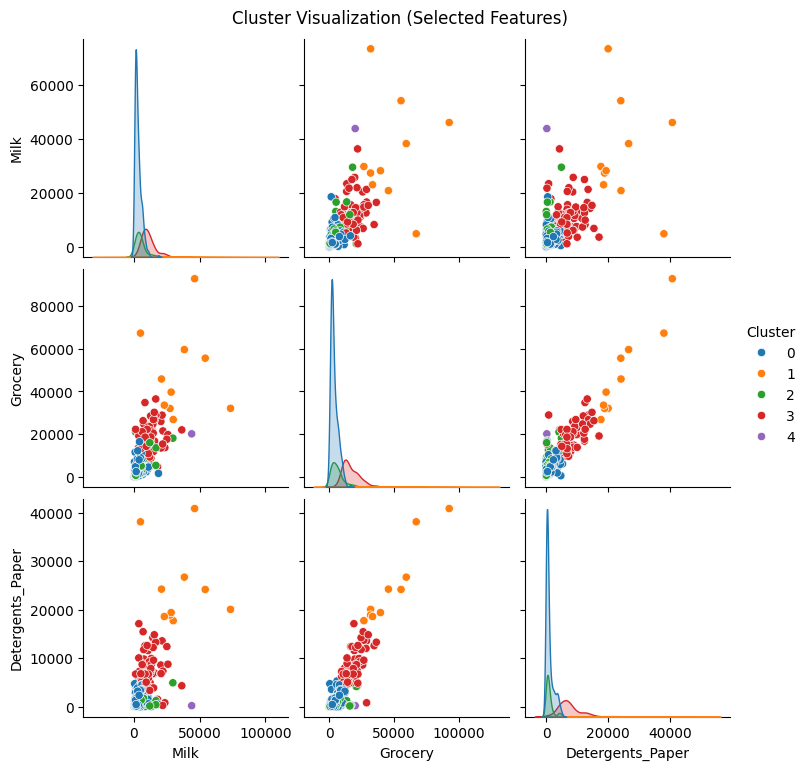


✅ Silhouette Score for k=5: 0.369

Cluster Distribution:
Cluster
0    270
3     96
2     63
1     10
4      1
Name: count, dtype: int64


In [32]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv('/content/Wholesale customers data.csv')

print("✅ Dataset loaded successfully!\n")
print(df.head())

print("\nDataset Info:\n")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K = range(2, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


silhouette_scores = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'ro--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

optimal_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"\n✅ Optimal number of clusters based on Silhouette Score: {optimal_k}")

final_k = 5

kmeans = KMeans(n_clusters=final_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
print("\nCluster Centers (original scale):\n")
print(cluster_centers)

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Cluster Centers Heatmap (Wholesale Customers)")
plt.show()

sns.pairplot(df, vars=['Milk', 'Grocery', 'Detergents_Paper'], hue='Cluster', palette='tab10')
plt.suptitle("Cluster Visualization (Selected Features)", y=1.02)
plt.show()

final_score = silhouette_score(X_scaled, df['Cluster'])
print(f"\n✅ Silhouette Score for k={final_k}: {final_score:.3f}")


print("\nCluster Distribution:")
print(df['Cluster'].value_counts())


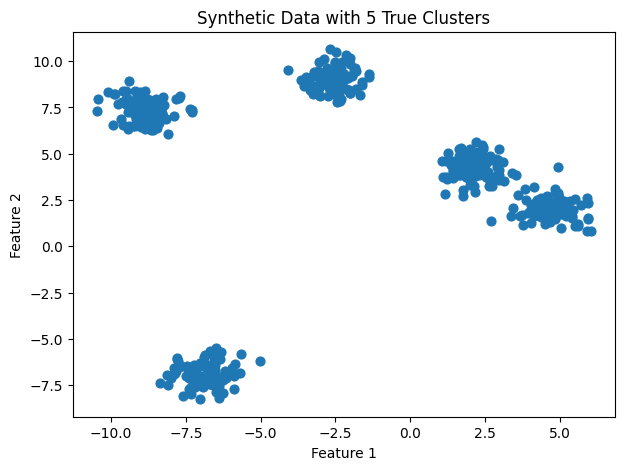

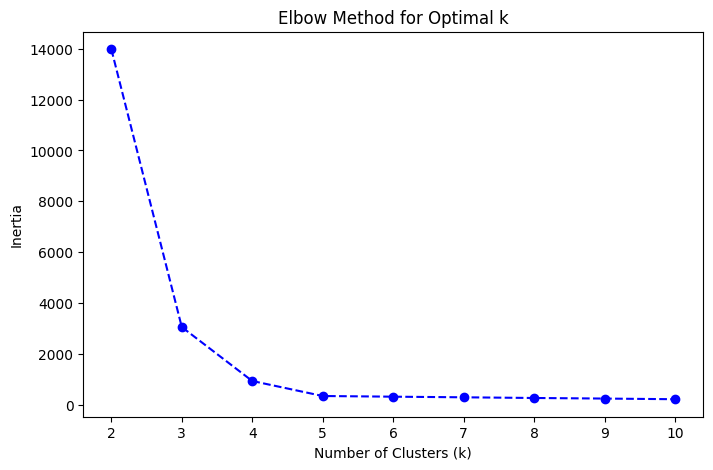

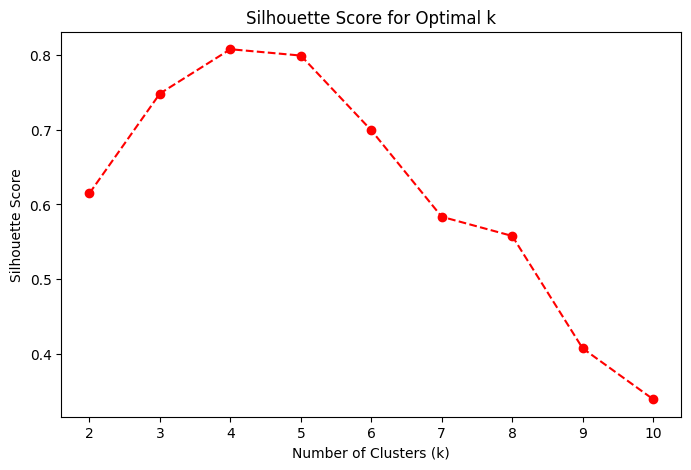


✅ Optimal number of clusters (based on Silhouette Score): 4


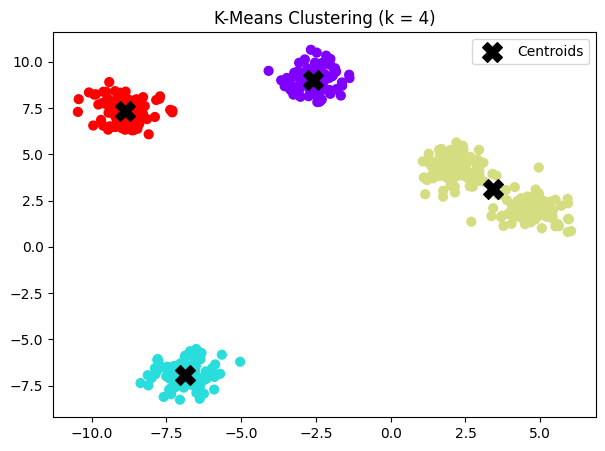

✅ Silhouette Score for k=4: 0.808


In [34]:


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd


X, y_true = make_blobs(
    n_samples=500,
    n_features=2,
    centers=5,
    cluster_std=0.60,
    random_state=42
)

plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], s=40)
plt.title("Synthetic Data with 5 True Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


inertias = []
K = range(2, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X)
    inertias.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertias, 'bo--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

silhouette_scores = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'ro--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k")
plt.show()

best_k_silhouette = K[silhouette_scores.index(max(silhouette_scores))]
print(f"\n✅ Optimal number of clusters (based on Silhouette Score): {best_k_silhouette}")

final_k = best_k_silhouette
kmeans = KMeans(n_clusters=final_k, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=40, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='black', s=200, marker='X', label='Centroids')
plt.title(f"K-Means Clustering (k = {final_k})")
plt.legend()
plt.show()

final_score = silhouette_score(X, y_kmeans)
print(f"✅ Silhouette Score for k={final_k}: {final_score:.3f}")
